In [1]:
import pandas as pd
from datetime import date, datetime
from matplotlib import pyplot as plt
import requests
import seaborn as sns
from datetime import datetime, timedelta

In [2]:
#Esta función hace que no tengamos que bajar los datos, si no que los extrae

base_url = "https://analytics.wikimedia.org/published/datasets"
cols = ["wiki_db", "project", "country", "country_code", "activity_level", "editors", "edits", "time"]   #Para hacer la tabla 

def get_url(ds, type):
    d = datetime.strptime(ds, "%Y-%m").date()
    if d < date(2023, 7, 1) or d > date.today():
        print("Not a valid date. Please try a month between July 2023 and now")
    else:
        if type == "monthly":
            return f"{base_url}/geoeditors_monthly/{ds}.tsv"
        elif type == "weekly":
            return f"{base_url}/geoeditors_weekly/{ds}.tsv"
    return None

In [3]:
### genera la lista de meses ###
current_date = datetime.now()
start_date = datetime(2023, 7, 1)
date_list = []

# Generate dates from July 2023 to one month before the current month
while start_date < current_date.replace(day=1):
    date_list.append(start_date.strftime("%Y-%m"))
    start_date += timedelta(days=30)  # Add 30 days to move to the next month

date_list = list(set(date_list))
# Sort the list of unique dates in ascending order
date_list.sort()
print(date_list)

['2023-07', '2023-08', '2023-09', '2023-10', '2023-11', '2023-12', '2024-01', '2024-02', '2024-03']


In [4]:
masterdf = pd.DataFrame()
user_level = ["1 to 4", "5 to 99", "100 or more"]

#get dataframe for all the weeks

for i in date_list:
	try:
		ds = i
		url = get_url(ds, type="weekly")
		#print(url)
		df = pd.read_csv(url, delimiter='\t', names=cols, on_bad_lines='warn')                              #acá df es el dataframe raw, osea el que tiene la info de toooodo
		filtered_df = df[df["country_code"] == "CL"]                                                                  #filtramos por CL y lo agregamos al masterdf
		masterdf = pd.concat([masterdf, filtered_df], axis=0, ignore_index=True)                                #agregamos la info a un master dataframe
	except:
		pass



In [5]:
masterdf

,wiki_db,project,country,country_code,activity_level,editors,edits,time
0,bswikisource,bs.wikisource,Chile,CL,100 or more,8,41,2023-06-25
1,commonswiki,en.commons,Chile,CL,1 to 4,49,70,2023-06-25
2,commonswiki,en.commons,Chile,CL,1 to 4,47,60,2023-07-02
3,commonswiki,en.commons,Chile,CL,1 to 4,53,67,2023-07-09
4,commonswiki,en.commons,Chile,CL,1 to 4,51,69,2023-07-16
...,...,...,...,...,...,...,...,...
152,eswiktionary,es.wiktionary,Chile,CL,1 to 4,21,29,2023-09-03
153,eswiki,es.wikipedia,Chile,CL,1 to 4,1403,1899,2023-09-03
154,enwiki,en.wikipedia,Chile,CL,1 to 4,203,275,2023-09-03
155,commonswiki,en.commons,Chile,CL,1 to 4,37,47,2023-09-03


ESWIKI

In [6]:
eswiki = masterdf.loc[(masterdf.project == "es.wikipedia")]
eswiki = eswiki.sort_values(by="time")
eswiki

,wiki_db,project,country,country_code,activity_level,editors,edits,time
22,eswiki,es.wikipedia,Chile,CL,1 to 4,1214,1671,2023-06-25
27,eswiki,es.wikipedia,Chile,CL,100 or more,15,1326,2023-06-25
32,eswiki,es.wikipedia,Chile,CL,5 to 99,231,4541,2023-06-25
23,eswiki,es.wikipedia,Chile,CL,1 to 4,1034,1404,2023-07-02
28,eswiki,es.wikipedia,Chile,CL,100 or more,15,1374,2023-07-02
33,eswiki,es.wikipedia,Chile,CL,5 to 99,254,4090,2023-07-02
24,eswiki,es.wikipedia,Chile,CL,1 to 4,1062,1404,2023-07-09
34,eswiki,es.wikipedia,Chile,CL,5 to 99,266,4918,2023-07-09
29,eswiki,es.wikipedia,Chile,CL,100 or more,11,1420,2023-07-09
35,eswiki,es.wikipedia,Chile,CL,5 to 99,263,4812,2023-07-16


In [7]:
##### Editores #####
eswiki_editores = eswiki.pivot(index='time', columns='activity_level', values='editors')
eswiki_editores = eswiki_editores[user_level]                     # Reordenamos las columnas para que vayan en orden ascendente
eswiki_editores

activity_level,1 to 4,5 to 99,100 or more
time,,,
2023-06-25,1214,231,15
2023-07-02,1034,254,15
2023-07-09,1062,266,11
2023-07-16,1236,263,14
2023-07-23,1233,227,19
2023-07-30,1183,256,13
2023-08-06,1281,238,18
2023-08-13,1231,257,16
2023-08-20,1341,236,18


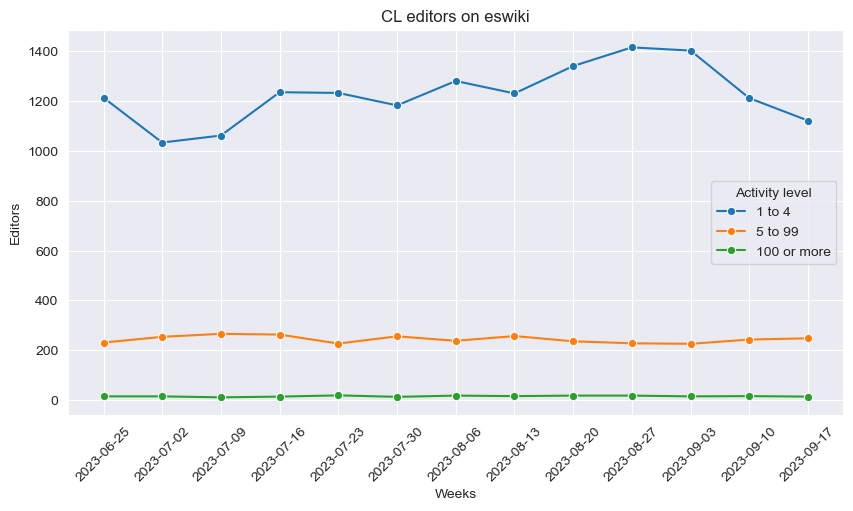

In [8]:
sns.set_style("darkgrid")

plt.figure(figsize=(10, 5))
for level in user_level:
    subset = eswiki[eswiki.activity_level == level]
    sns.lineplot(data=subset, x="time", y="editors", label=level, marker="o")

plt.xticks(rotation=45)
plt.xlabel('Weeks')
plt.ylabel('Editors')
plt.title('CL editors on eswiki')
plt.legend(title='Activity level')
plt.show()


In [9]:
##### Ediciones #####

eswiki_ediciones = eswiki.pivot(index='time', columns='activity_level', values='edits')
eswiki_ediciones = eswiki_ediciones[user_level]                     # Reordenamos las columnas para que vayan en orden ascendente
eswiki_ediciones

activity_level,1 to 4,5 to 99,100 or more
time,,,
2023-06-25,1671,4541,1326
2023-07-02,1404,4090,1374
2023-07-09,1404,4918,1420
2023-07-16,1573,4812,1610
2023-07-23,1686,4146,1757
2023-07-30,1530,4928,1459
2023-08-06,1700,4431,2029
2023-08-13,1673,5038,1810
2023-08-20,1718,4434,1848


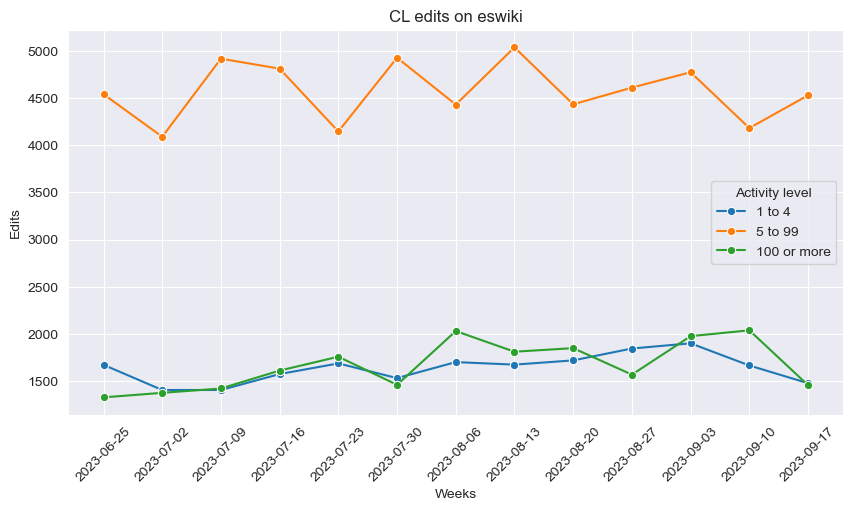

In [10]:
sns.set_style("darkgrid")

plt.figure(figsize=(10, 5))
for level in user_level:
    subset = eswiki[eswiki.activity_level == level]
    sns.lineplot(data=subset, x="time", y="edits", label=level, marker="o")

plt.xticks(rotation=45)
plt.xlabel('Weeks')
plt.ylabel('Edits')
plt.title('CL edits on eswiki')
plt.legend(title='Activity level')
plt.show()

/var/folders/r_/pfd9f2dd7dv3qnfzgmrqkdww0000gn/T/ipykernel_15060/836978929.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


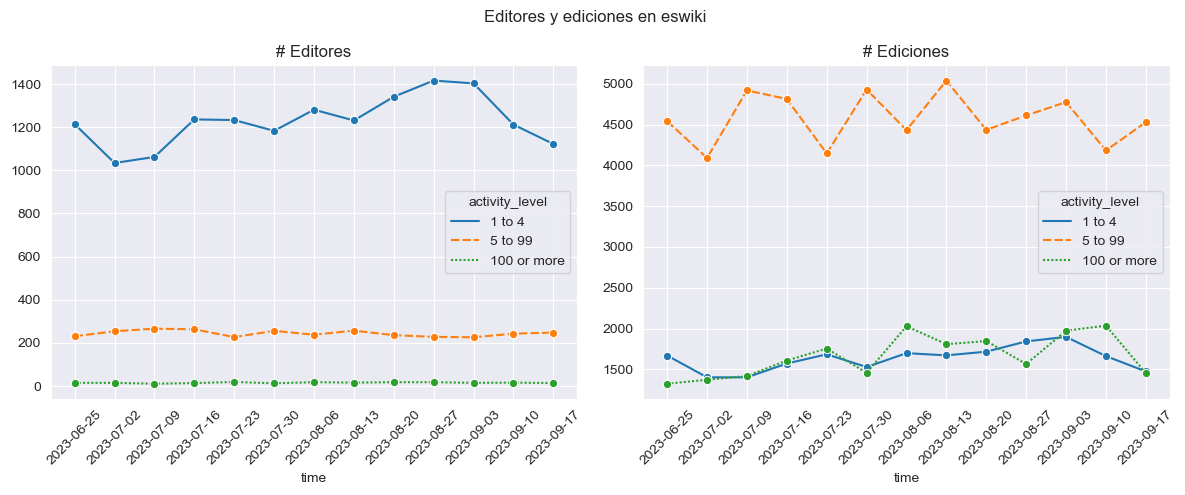

In [11]:
##### ambas figuras #####

# Create a subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 5)) 

# Editores
sns.lineplot(data=eswiki_editores, ax=axes[0], marker="o")
axes[0].set_title('# Editores')
axes[0].tick_params

# Ediciones
sns.lineplot(data=eswiki_ediciones, ax=axes[1], marker="o")
axes[1].set_title('# Ediciones')

for ax in axes:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

fig.suptitle("Editores y ediciones en eswiki")

plt.tight_layout()
plt.show()


WIKIDATA   

In [12]:
wikidata = masterdf.loc[(masterdf.wiki_db == "wikidatawiki")]
wikidata = wikidata.sort_values(by="time")

In [13]:
##### Editores #####

wikidata_editores = wikidata.pivot(index='time', columns='activity_level', values='editors')
wikidata_editores

activity_level,1 to 4,5 to 99
time,,
2023-06-25,85,39
2023-07-02,81,28
2023-07-09,70,27
2023-07-16,122,34
2023-07-23,99,35
2023-07-30,115,34
2023-08-06,114,30
2023-08-13,112,27
2023-08-20,116,35


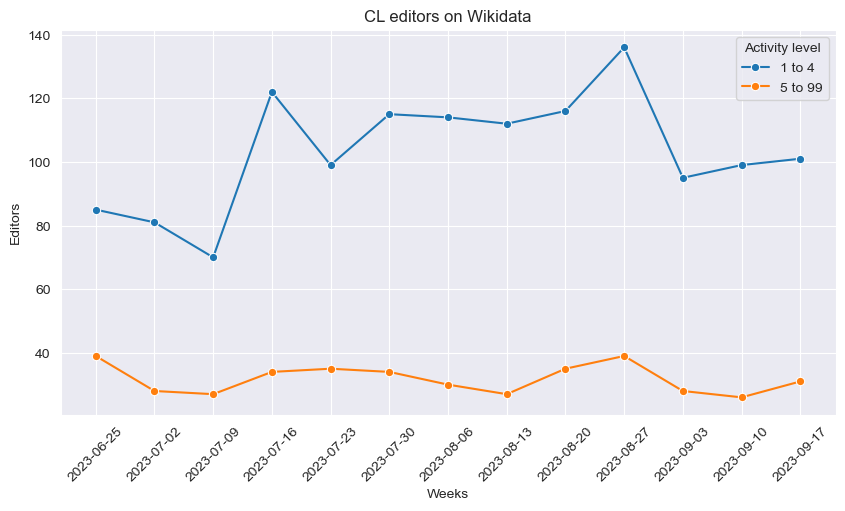

In [14]:
sns.set_style("darkgrid")

plt.figure(figsize=(10, 5))
for level in user_level:
    subset = wikidata[wikidata.activity_level == level]
    sns.lineplot(data=subset, x="time", y="editors", label=level, marker="o")

plt.xticks(rotation=45)
plt.xlabel('Weeks')
plt.ylabel('Editors')
plt.title('CL editors on Wikidata')
plt.legend(title='Activity level')
plt.show()


In [15]:
##### Ediciones #####

wikidata_edits = wikidata.pivot(index='time', columns='activity_level', values='edits')
wikidata_edits

activity_level,1 to 4,5 to 99
time,,
2023-06-25,133,689
2023-07-02,124,352
2023-07-09,92,727
2023-07-16,148,636
2023-07-23,131,287
2023-07-30,138,684
2023-08-06,146,602
2023-08-13,139,549
2023-08-20,139,806


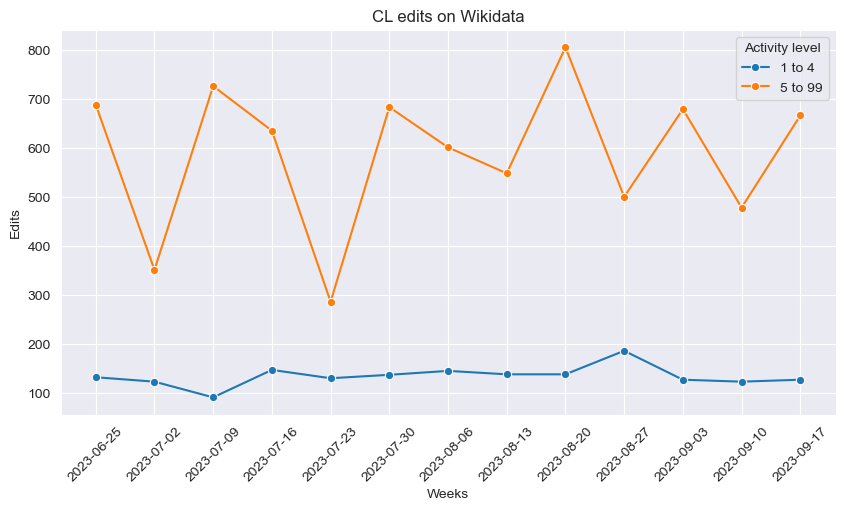

In [16]:
sns.set_style("darkgrid")

plt.figure(figsize=(10, 5))
for level in user_level:
    subset = wikidata[wikidata.activity_level == level]
    sns.lineplot(data=subset, x="time", y="edits", label=level, marker="o")

plt.xticks(rotation=45)
plt.xlabel('Weeks')
plt.ylabel('Edits')
plt.title('CL edits on Wikidata')
plt.legend(title='Activity level')
plt.show()

/var/folders/r_/pfd9f2dd7dv3qnfzgmrqkdww0000gn/T/ipykernel_15060/2441850924.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


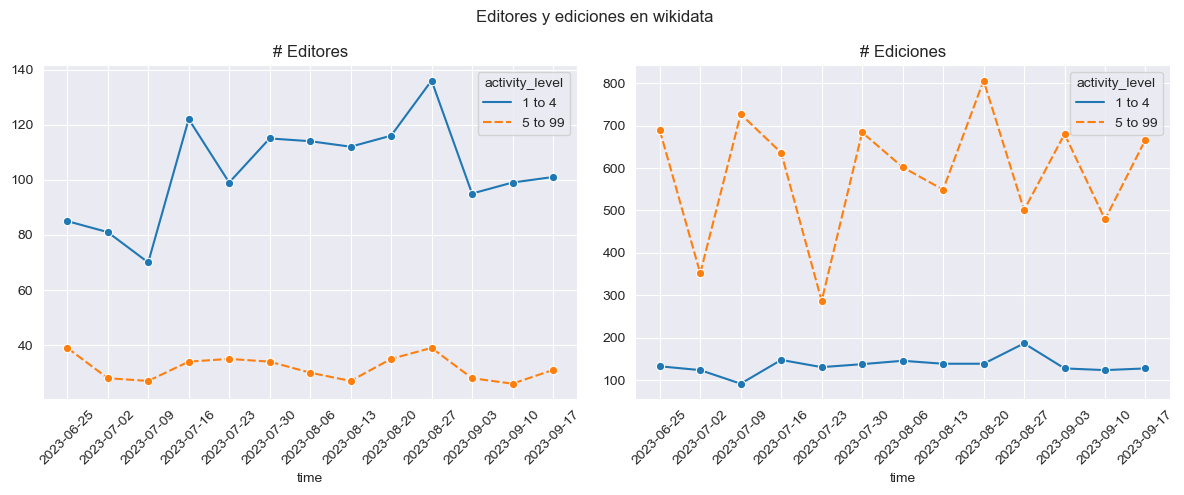

In [17]:
##### ambas figuras #####

# Create a subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 5)) 

# Editores
sns.lineplot(data=wikidata_editores, ax=axes[0], marker="o")
axes[0].set_title('# Editores')
axes[0].tick_params

# Ediciones
sns.lineplot(data=wikidata_edits, ax=axes[1], marker="o")
axes[1].set_title('# Ediciones')

for ax in axes:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

fig.suptitle("Editores y ediciones en wikidata")

plt.tight_layout()
plt.show()


COMMONS

In [18]:
commons = masterdf.loc[(masterdf.wiki_db == "commonswiki")]
commons = commons.sort_values(by="time")

In [19]:
##### Editores #####

commons_editores = commons.pivot(index='time', columns='activity_level', values='editors')
commons_editores

activity_level,1 to 4,5 to 99
time,,
2023-06-25,49,18
2023-07-02,47,23
2023-07-09,53,28
2023-07-16,51,22
2023-07-23,44,24
2023-07-30,44,28
2023-08-06,39,26
2023-08-13,40,27
2023-08-20,59,27


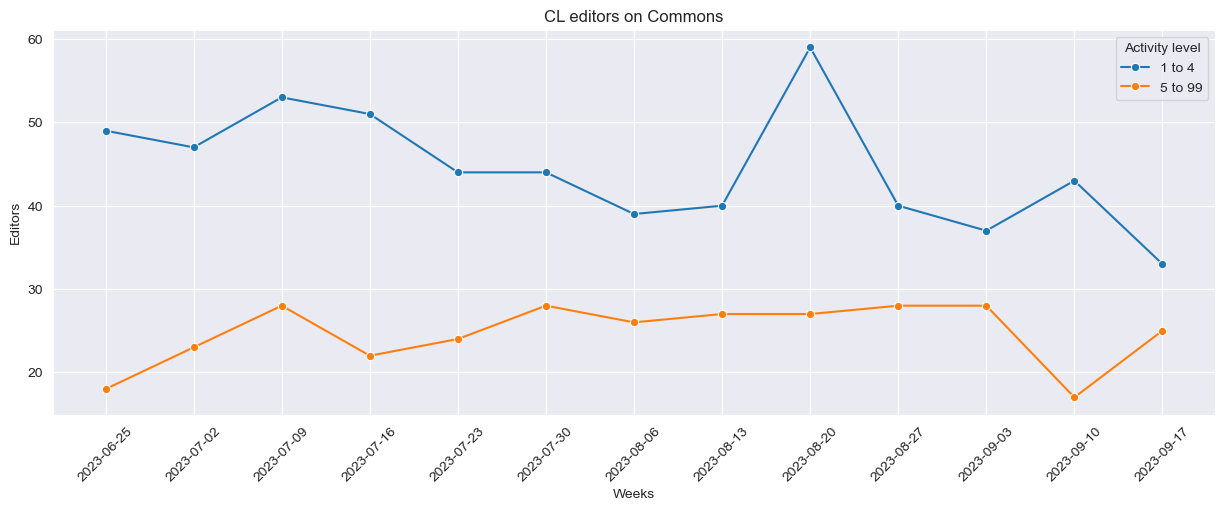

In [20]:
sns.set_style("darkgrid")

plt.figure(figsize=(15, 5))

for level in user_level:
    subset = commons[commons.activity_level == level]
    sns.lineplot(data=subset, x="time", y="editors", label=level, marker="o")

plt.xticks(rotation=45)
plt.xlabel('Weeks')
plt.ylabel('Editors')
plt.title('CL editors on Commons')
plt.legend(title='Activity level')
plt.show()


In [21]:
##### Ediciones #####
commons_ediciones = commons.pivot(index='time', columns='activity_level', values='edits')
commons_ediciones

activity_level,1 to 4,5 to 99
time,,
2023-06-25,70,427
2023-07-02,60,683
2023-07-09,67,847
2023-07-16,69,217
2023-07-23,50,650
2023-07-30,56,688
2023-08-06,58,231
2023-08-13,64,966
2023-08-20,83,493


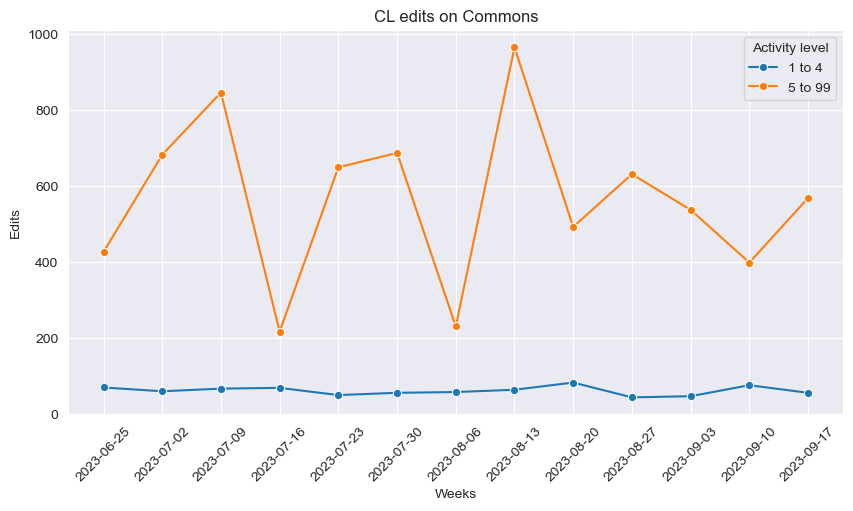

In [22]:
sns.set_style("darkgrid")

plt.figure(figsize=(10, 5))
for level in user_level:
    subset = commons[commons.activity_level == level]
    sns.lineplot(data=subset, x="time", y="edits", label=level, marker="o")

plt.xticks(rotation=45)
plt.xlabel('Weeks')
plt.ylabel('Edits')
plt.title('CL edits on Commons')
plt.legend(title='Activity level')
plt.show()

/var/folders/r_/pfd9f2dd7dv3qnfzgmrqkdww0000gn/T/ipykernel_15060/2040302999.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


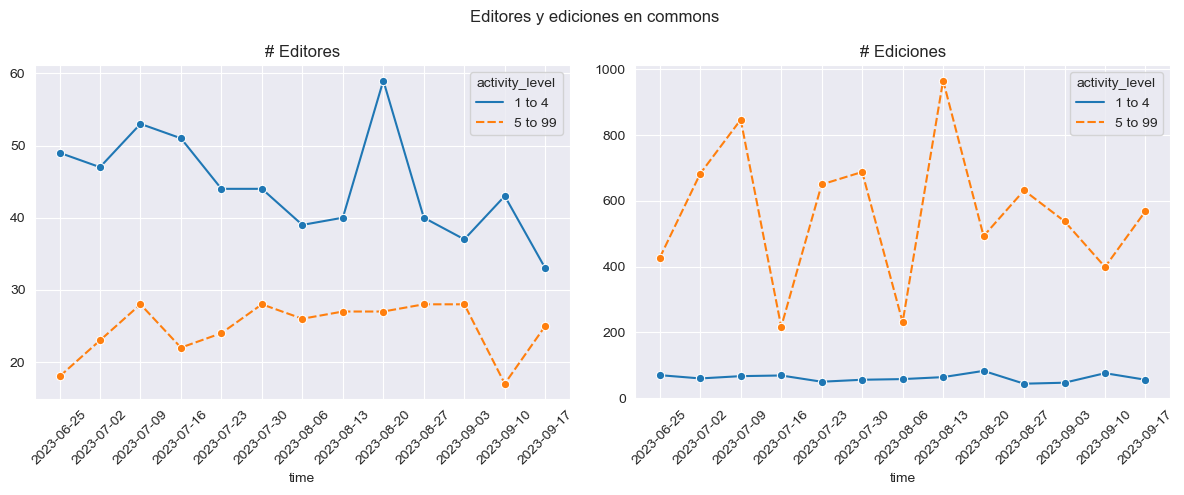

In [23]:
##### ambas figuras #####

# Create a subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 5)) 

# Editores
sns.lineplot(data=commons_editores, ax=axes[0], marker="o")
axes[0].set_title('# Editores')
axes[0].tick_params

# Ediciones
sns.lineplot(data=commons_ediciones, ax=axes[1], marker="o")
axes[1].set_title('# Ediciones')

for ax in axes:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

fig.suptitle("Editores y ediciones en commons")

plt.tight_layout()
plt.show()


Ediciones por proyecto

Text(0.5, 1.07, 'CL edits on Wiki projects')

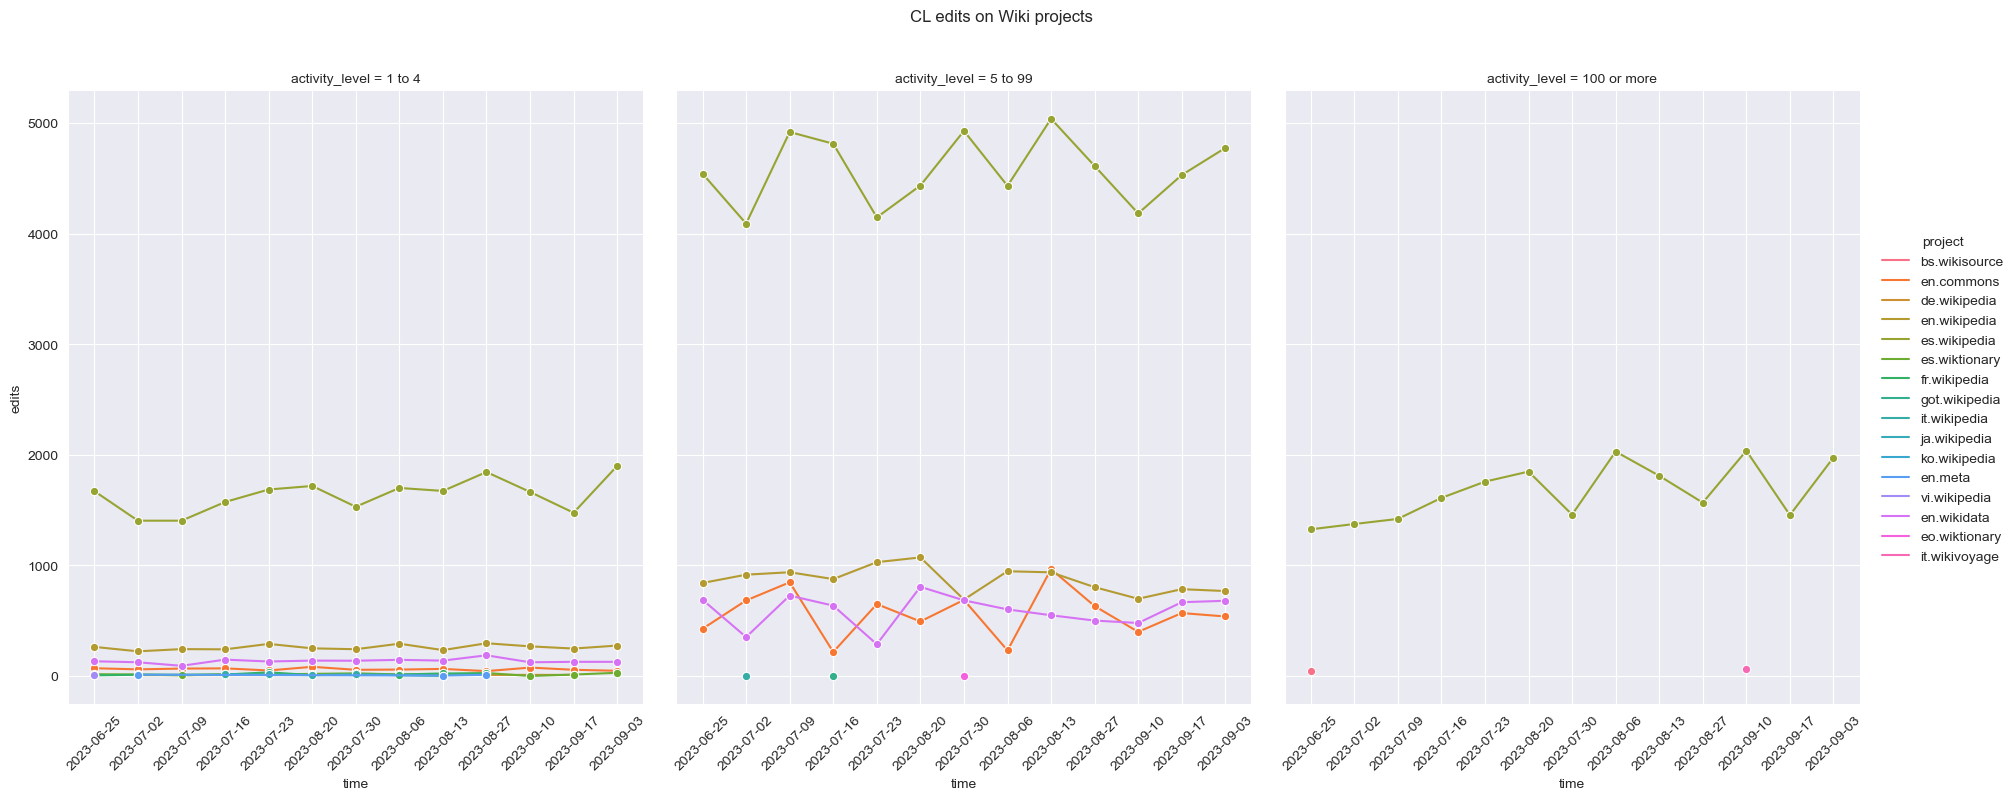

In [24]:
#### Para cada uno de los proyectos #####


g= sns.relplot(
    data=masterdf,
    x="time", y="edits",
    hue="project", col="activity_level",
    height=7, aspect=.9, kind="line", marker="o",
    col_order=user_level 
)

g.set_xticklabels(rotation = 45)
g.fig.suptitle("CL edits on Wiki projects", y=1.07, ha="center")
